In [23]:
# Solving advection equation u_t + c*u_x = v*u_xx
# u(x, 0) = sin(pi*x) for 0 <= x <= 1
# u(0, t) = sin(1, t) = 0
# dx = 0.05 dt = 0.005 v = {0.01, 0.1, 0.5, 1}

import numpy as np


def thomas_algorithm(a, b, c, d):
    """
    Solves the Tridiagonal Linear System
          --             -- -- --   -- --
          |b_1 c_1        | |f_1|   |d_1|
          |a_2 b_2 c_2    | | . |   | . |
          |    a_3 . . .  | | . | = | . |
          |               | |   |   |   |
          |               | |   |   |   |
          |       a_n b_n | |f_n|   |d_n|
          --             -- -- --   -- --
    """
    a = list(a)
    b = list(b)
    c = list(c)
    d = list(d)
    assert len(a) == len(b) == len(c) == len(d)
    N = len(c)
    c_ = [None for i in range(N)]
    d_ = [None for i in range(N)]
    f = [None for i in range(N)]
    c_[0] = c[0]/b[0]
    d_[0] = d[0]/b[0]

    for i in range(1, N):
        if i is not N-1:
            c_[i] = c[i]/(b[i] - a[i]*c_[i-1])

        d_[i] = (d[i] - a[i]*d_[i-1])/(b[i] - a[i]*c_[i-1])

    f[N-1] = d_[N-1]
    for i in range(N-2, -1, -1):
        f[i] = d_[i] - c_[i]*f[i+1]

    return f


def crank_nikolson(c, v):
    dx = 0.05
    dt = 0.005
    # Range of X and T
    rX = 1
    rT = 0.1
    n = int(rX/dx)
    m = int(rT/dt)
    X = np.linspace(0, rX, n)
    Y = np.linspace(0, rT, m)

    U = np.zeros((n, m), dtype=np.float64)  # U at nth iteration
    U[0, :] = 0
    U[n-1, :] = 0
    U[:, 0] = np.sin(np.pi*X)
    for k in range(1, m/2):
        A = [None] + [v/dx**2 + c/(2*dx) for i in range(1, n)]
        B = [-v/dx**2 - 2/dt + c/(2*dx)] + [2*v/dx**2 + c/(2*dt) for i in range(1, n-1)] + [-v/dx**2 - 2/dt - c/(2*dx)]
        C = [v/dx**2 - c/(2*dx) for i in range(1, n)] + [None]
        a = U[0:n-2, k-1]*(v/dx**2 + c/(2*dx))
        b = U[1:n-1, k-1]*(v/dx**2 + c/(2*dt))
        c = U[2:n, k-1]*(v/dx**2 - c/(2*dx))
        # print len(a), len(b), len(c)
        mid_vals =  a + b + c
        D = [U[0, k-1]*(-v/dx**2 - 2/dt + c/(2*dx))] + \
            list(mid_vals) \
                        + [U[n-1, k-1]*(-v/dx**2 - 2/dt - c/(2*dx))]
        U[:, k] = np.array(thomas_algorithm(A, B, C, D))[:, 0]

    return U, X
U_1, X = crank_nikolson(1, 0.1)
U_2, X = crank_nikolson(1, 0.5)
U_3, X = crank_nikolson(1, 1)



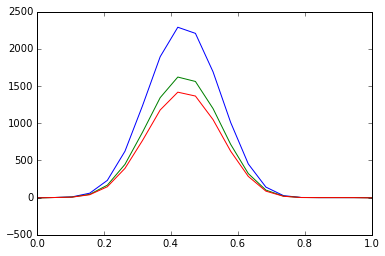

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, U_1[:,4]);plt.plot(X, U_2[:,4]);plt.plot(X, U_3[:,4])